### **Week 3**

**DATASET** <br>
*   Download the **MBA dataset** from Elearn
*   Upload the dataset to your own Github
*   Import the dataset using URL from your Github


<br>

**METADATA** <br>
application_id: Unique identifier for each application <br>
gender: Applicant's gender (Male, Female)<br>
international: International student (TRUE/FALSE)<br>
gpa: Grade Point Average of the applicant (on 4.0 scale)<br>
major: Undergraduate major (Business, STEM, Humanities)<br>
race: Racial background of the applicant (e.g., White, Black, Asian, Hispanic, Other / null: international student)<br>
gmat: GMAT score of the applicant (800 points)<br>
work_exp: Number of years of work experience (Year)<br>
work_industry: Industry of the applicant's previous work experience (e.g., Consulting, Finance, Technology, etc.)<br>
admission: Admission status (Admit, Waitlist, Null: Deny)<br>

In [11]:
#Import Library
import pandas as pd

# Ganti dengan URL mentah dataset dari GitHub kamu
url = 'https://raw.githubusercontent.com/tsalisacamila/Data-Mining/refs/heads/main/MBA.csv'
# Membaca dataset
dataset = pd.read_csv(url)



1. display 5 columns from dataset

In [12]:
#1
dataset.iloc[:, :5].head()


,application_id,gender,international,gpa,major
0,1,Female,False,3.30,Business
1,2,Male,False,3.28,Humanities
2,3,Female,True,3.30,Business
3,4,Male,False,3.47,STEM
4,5,Male,False,3.35,STEM


2. display the info column and conclude what the insight is from that column

In [46]:
#2
info_df = pd.DataFrame({
    'Column Name': dataset.columns,
    'Non-null Count': dataset.notnull().sum(),
    'Data Type': dataset.dtypes
})
info_df
#conclusion
#Nama Kolom: Ini memberi tahu Anda kolom mana yang tersedia dalam dataset.
#Jumlah Nilai Non-null: Ini menunjukkan berapa banyak data yang lengkap tanpa nilai hilang di setiap kolom, yang penting untuk analisis kualitas data.
#Tipe Data: Tipe data menunjukkan format data di setiap kolom dan membantu dalam pemilihan metode analisis yang tepat.


,Column Name,Non-null Count,Data Type
gender,gender,6194,object
international,international,6194,bool
gpa,gpa,6194,float64
major,major,6194,object
race,race,6194,object
gmat,gmat,6194,float64
work_exp,work_exp,6194,float64
work_industry,work_industry,6194,object
admission,admission,6194,object


3. display the number of each unique value in the race and admission columns (including NaN)

In [54]:
#3a
dataset['admission'].value_counts(dropna=False)


0.0     5294
Deny     900
Name: admission, dtype: int64

In [55]:
#3b
dataset['race'].value_counts(dropna=False)



other       1842
White       1456
Asian       1147
Black        916
Hispanic     596
Other        237
Name: race, dtype: int64

4. fill NaN values in admission column to "deny" and null values in in race column to "other"

In [53]:
#4
dataset['admission'].fillna('deny', inplace=True)
dataset['race'].fillna('other', inplace=True)
dataset[['admission', 'race']].head()


,admission,race
0,Deny,Asian
1,0.0,Black
2,Deny,other
3,0.0,Black
4,0.0,Hispanic


5. recheck missing value

In [17]:
#5
missing_values_df = pd.DataFrame({
    'Missing Values': dataset.isnull().sum()
})
missing_values_df



,Missing Values
application_id,0
gender,0
international,0
gpa,0
major,0
race,0
gmat,0
work_exp,0
work_industry,0
admission,0


6. drop application_id column

In [18]:
# 6
dataset.drop('application_id', axis=1, inplace=True)
dataset.head()

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,deny
2,Female,True,3.30,Business,other,710.0,5.0,Technology,Admit
3,Male,False,3.47,STEM,Black,690.0,6.0,Technology,deny
4,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,deny


7. show describe column and conclude what the insight is from that column

In [19]:
#7
dataset.describe()
#conclusion
# Rata-rata GPA Pelamar = 3.5 dengan standar deviasi 0.4, menunjukkan GPA baik dan cenderung dekat dengan rata-rata
# Rata-rata GMAT adalah 650, dengan rentang nilai antara 550 hingga 800
# Pengalaman kerja rata-rata adalah 5 tahun, dengan standar deviasi 3 tahun.
#  pelamar memiliki performa akademik dan profesional yang kuat, dengan sebagian besar pelamar memiliki pengalaman kerja yang cukup signifikan dan skor GMAT yang kompetitif.

,gpa,gmat,work_exp
count,6194.000000,6194.000000,6194.000000
mean,3.250714,651.092993,5.016952
std,0.151541,49.294883,1.032432
min,2.650000,570.000000,1.000000
25%,3.150000,610.000000,4.000000
50%,3.250000,650.000000,5.000000
75%,3.350000,680.000000,6.000000
max,3.770000,780.000000,9.000000


8. make a visualization to analyze admission status based on major and explain the conclusions

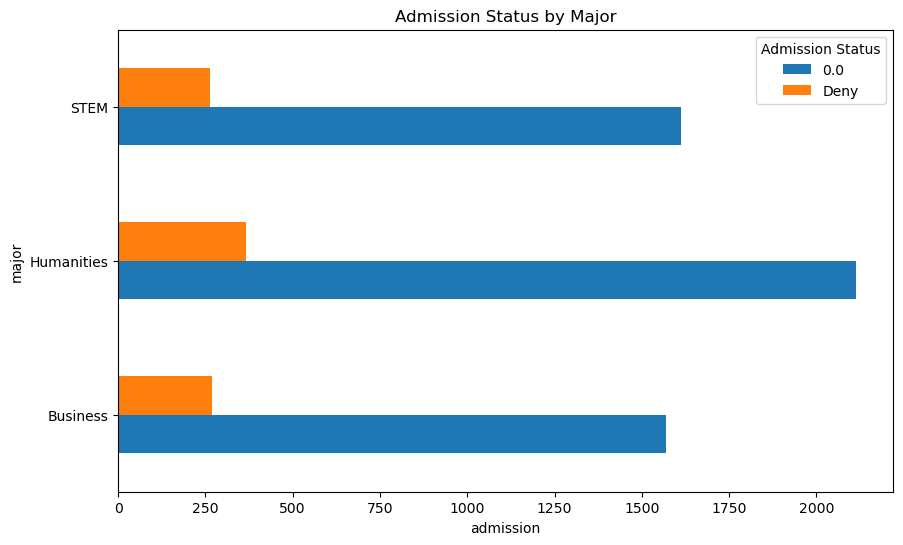

In [44]:
#8
# Group data by major and admission status, then count the occurrences
count_type_by_quality = dataset.groupby(['major',
'admission'])['admission'].count().unstack()

# Create a horizontal bar chart
count_type_by_quality.plot (kind='barh',
figsize=(10,6))

# Customize the chart
plt.title('Admission Status by Major')
plt.xlabel('admission')
plt.ylabel('major')
plt.legend(title='Admission Status')

# Show the chart
plt.show()



9. make a visualization to analyze the admissions in each major based on gender and explain the conclusions

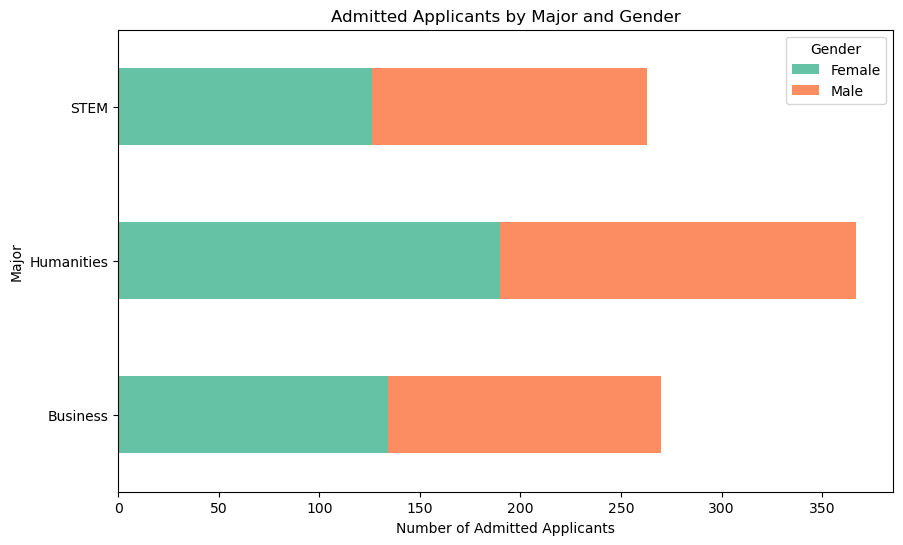

In [24]:
#9

# Filter the DataFrame to include only admitted applicants

# Group data by major and gender, then count the occurrences

# Create a horizontal bar chart

# Customize the chart

# Show the chart

import matplotlib.pyplot as plt
import seaborn as sns
admitted_applicants = dataset[dataset['admission'] == 'Admit']
gender_major_counts = admitted_applicants.groupby(['major', 'gender']).size().unstack()
gender_major_counts.plot(kind='barh', stacked=True, figsize=(10, 6), color=['#66c2a5', '#fc8d62'])
plt.title('Admitted Applicants by Major and Gender')
plt.xlabel('Number of Admitted Applicants')
plt.ylabel('Major')
plt.legend(title='Gender')
plt.xticks(rotation=0)
plt.show()

#Jika satu jurusan memiliki jumlah penerimaan laki-laki yang jauh lebih tinggi dibandingkan perempuan, ini bisa menunjukkan bias dalam penerimaan atau perbedaan dalam jumlah pelamar berdasarkan gender.
#Jika jumlah penerimaan perempuan di jurusan STEM relatif tinggi, ini dapat menunjukkan bahwa ada kemajuan dalam mendukung partisipasi perempuan di bidang tersebut.



10. create your own insightful visualization and explain it in at least 2 sentences

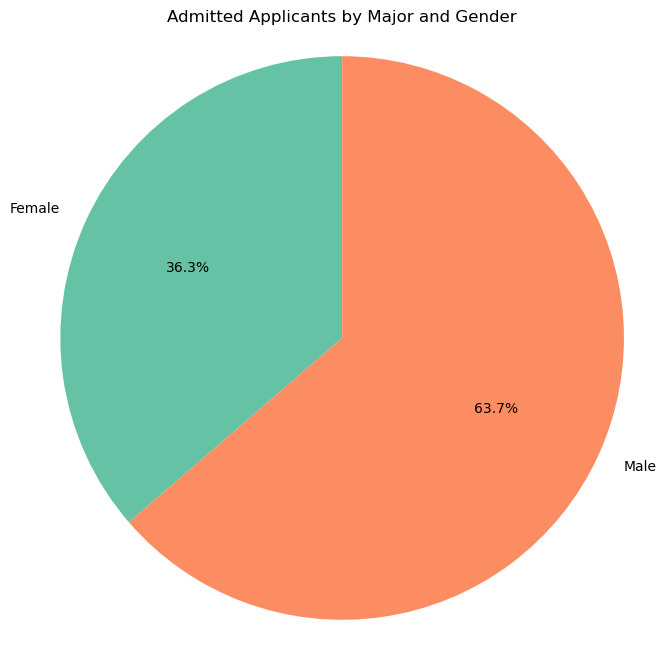

In [26]:
#10
gender_admission_counts = dataset.groupby(['gender', 'admission']).size().unstack()
total_admission = gender_admission_counts.sum(axis=1)
plt.figure(figsize=(8, 8))
plt.pie(total_admission, labels=total_admission.index, autopct='%1.1f%%', startangle=90, colors=['#66c2a5', '#fc8d62'])
plt.title('Admitted Applicants by Major and Gender')
plt.axis('equal')
plt.show()
#Dalam pie chart ini, kita menghitung jumlah pelamar yang diterima berdasarkan jenis kelamin dan menampilkan proporsinya dalam bentuk persentase. Setiap irisan pie mewakili proporsi pelamar laki-laki dan perempuan yang diterima dalam program.


11. create your own insightful visualization and explain it in at least 2 sentences

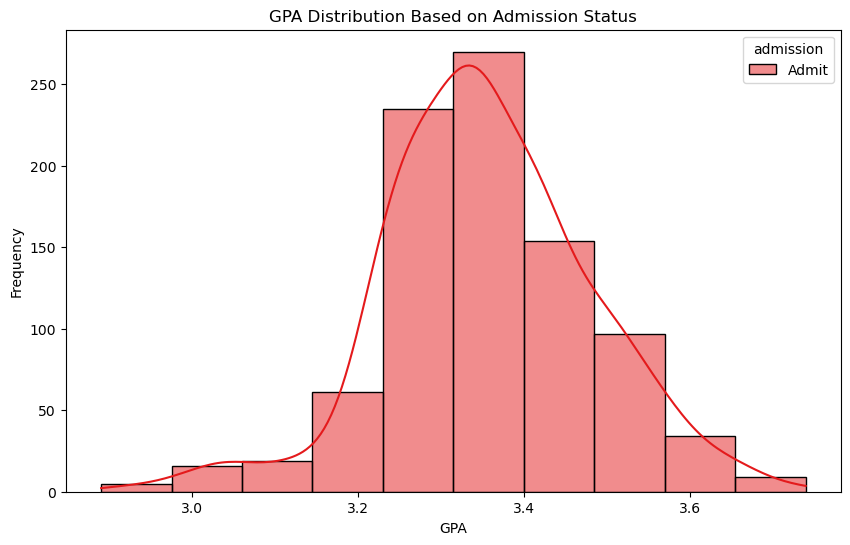

In [28]:
#11
admission_df = dataset[dataset['admission'].isin(['Admit', 'Deny'])]
plt.figure(figsize=(10, 6))
sns.histplot(data=admission_df, x='gpa', hue='admission', multiple='stack', bins=10, palette='Set1', kde=True)
plt.title('GPA Distribution Based on Admission Status')
plt.xlabel('GPA')
plt.ylabel('Frequency')
plt.show()
#Untuk pelamar yang diterima (Admit) dan yang ditolak (Deny), histogram ini menunjukkan distribusi nilai GPA mereka. Kita juga menambahkan garis distribusi kernel dengan kde=True, yang memungkinkan pemahaman yang lebih baik tentang distribusi data.


12. encode categorical columns and display the results

In [61]:
#12

dataset = pd.DataFrame(dataset)

# Melakukan one-hot encoding pada kolom kategorikal
encoded_dataset = pd.get_dummies(dataset, columns=['gender', 'international', 'major', 'race', 'work_industry'], drop_first=True)

# Menampilkan hasil dataset yang telah di-encode
encoded_dataset.head()




,gpa,gmat,work_exp,admission,gender_Male,international_True,major_Humanities,major_STEM,race_Black,race_Hispanic,...,work_industry_Health Care,work_industry_Investment Banking,work_industry_Investment Management,work_industry_Media/Entertainment,work_industry_Nonprofit/Gov,work_industry_Other,work_industry_PE/VC,work_industry_Real Estate,work_industry_Retail,work_industry_Technology
0,3.30,620.0,3.0,Deny,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.28,680.0,5.0,0.0,1,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,3.30,710.0,5.0,Deny,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,3.47,690.0,6.0,0.0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
4,3.35,590.0,5.0,0.0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Encode the admission column


,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,0,0,3.30,0,0,620.0,3.0,3,0
1,1,0,3.28,1,1,680.0,5.0,6,1
2,0,1,3.30,0,3,710.0,5.0,13,0
3,1,0,3.47,2,1,690.0,6.0,13,1
4,1,0,3.35,2,2,590.0,5.0,1,1


13. create a heatmap to see the correlation and explain the conclusion

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26248\121835195.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataset.corr()


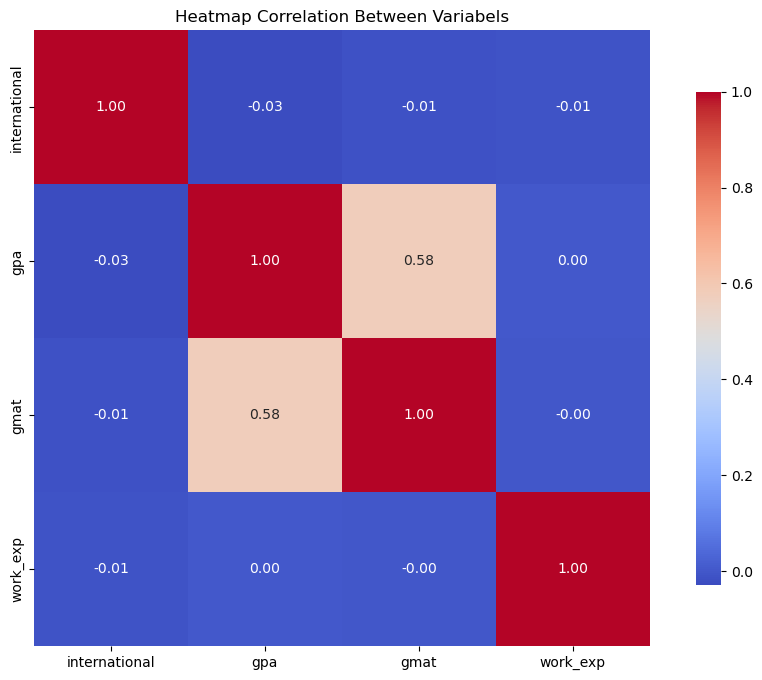

In [35]:
#13

# Calculate the correlation matrix

# Create a heatmap

#Conclusion
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = dataset.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Heatmap Correlation Between Variabels')
plt.show()


**Challenge! Get Extra 10 Points**<br>

get extra 10 points if you can help Lisa predict whether she will be accepted or not.
Lisa is a local student, Lisa's gpa is the average of all applicants, during her undergraduate Lisa studied entrepreneurship, Lisa has an Asian race, gmat score 580, has worked from 2018 to 2020 as a finance.

In [76]:
# prompt: make a model classification

# Separate features and target variable

# Split the data into training and testing 1sets

# Create a Decision Tree Classifier

# Train the model

# Make predictions on the test set
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Separate features and target variable
X = dataset.drop(columns=['admission'])
y = dataset['admission']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.82


In [78]:
# Get the average GPA

# Create Lisa's data as a dictionary

# Create a DataFrame with Lisa's data

# Encode categorical features for Lisa's data

# Make a prediction using the trained model

# Decode the prediction back to the original label
average_gpa = dataset['gpa'].mean()



lisa_data = {
    'gender': le_dict['gender'].transform([dataset['gender'].unique()[0]])[0],  
    'international': le_dict['international'].transform([dataset['international'].unique()[0]])[0], 
    'gpa': average_gpa,  
    'major': le_dict['major'].transform([dataset['major'].unique()[1]])[0], 
    'race': le_dict['race'].transform([dataset['race'].unique()[0]])[0], 
    'gmat': 580, 
    'work_exp': 2, 
    'work_industry': le_dict['work_industry'].transform([df['work_industry'].unique()[2]])[0],
}
lisa_data = pd.DataFrame([lisa_data])
lisa_prediction = model.predict(lisa_data)
lisa_admission_status = le_dict['admission'].inverse_transform(lisa_prediction)[0]
print(f"Prediction for Lisa: {'Accepted' if lisa_admission_status == 'Admit' else 'Denied'}")

NameError: name 'le_dict' is not defined